In [2]:
# Import basic data science packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import map visulization libraries
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Import encoders for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
accepted_df = pd.read_csv('accepted_2007_to_2018Q4.csv')

In [4]:
accepted_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
accepted_df.shape

(2260701, 151)

In [6]:
accepted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [7]:
accepted_df.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,500.00,8000.00,12900.00,20000.0000,40000.00
funded_amnt,2260668.0,15041.664057,9188.413022,500.00,8000.00,12875.00,20000.0000,40000.00
funded_amnt_inv,2260668.0,15023.437745,9192.331679,0.00,8000.00,12800.00,20000.0000,40000.00
int_rate,2260668.0,13.092829,4.832138,5.31,9.49,12.62,15.9900,30.99
...,...,...,...,...,...,...,...,...
hardship_payoff_balance_amount,10917.0,11636.883942,7625.988281,55.73,5627.00,10028.39,16151.8900,40306.41
hardship_last_payment_amount,10917.0,193.994321,198.629496,0.01,44.44,133.16,284.1900,1407.86
settlement_amount,34246.0,5010.664267,3693.122590,44.21,2208.00,4146.11,6850.1725,33601.00
settlement_percentage,34246.0,47.780365,7.311822,0.20,45.00,45.00,50.0000,521.35


# Data Cleaning

In [8]:
pd.set_option('display.max_columns',None) # display all columns without compression

In [9]:
columns= accepted_df.columns.to_list()
sorted(columns)

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'deferral_term',
 'delinq_2yrs',
 'delinq_amnt',
 'desc',
 'disbursement_method',
 'dti',
 'dti_joint',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'fico_range_high',
 'fico_range_low',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_flag',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'home_ownership',
 'id',
 'il_util',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_

In [10]:
accepted_df.rename(columns={'acc_now_delinq':'acc_now_dealing',
                           'delinq_2yrs':'deling_2yrs',
                           'inq_last_6mths':'ing_last_6mths'},inplace=True)

In [11]:
date_frame_columns = ['earliest_cr_line','issue_d', 'last_credit_pull_d','last_pymnt_d','last_pymnt_d','last_credit_pull_d']
accepted_df[date_frame_columns]

,earliest_cr_line,issue_d,last_credit_pull_d,last_pymnt_d,last_pymnt_d,last_credit_pull_d
0,Aug-2003,Dec-2015,Mar-2019,Jan-2019,Jan-2019,Mar-2019
1,Dec-1999,Dec-2015,Mar-2019,Jun-2016,Jun-2016,Mar-2019
2,Aug-2000,Dec-2015,Mar-2019,Jun-2017,Jun-2017,Mar-2019
3,Sep-2008,Dec-2015,Mar-2019,Feb-2019,Feb-2019,Mar-2019
4,Jun-1998,Dec-2015,Mar-2018,Jul-2016,Jul-2016,Mar-2018
...,...,...,...,...,...,...
2260696,Feb-1995,Oct-2016,Mar-2019,Mar-2019,Mar-2019,Mar-2019
2260697,Jul-1999,Oct-2016,Mar-2019,Oct-2017,Oct-2017,Mar-2019
2260698,Jun-1996,Oct-2016,Mar-2019,Mar-2019,Mar-2019,Mar-2019
2260699,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
pd.DataFrame({'no.of null values':accepted_df[date_frame_columns].isnull().sum(),
             '% of null values': ((accepted_df[date_frame_columns].isnull().sum())/len(accepted_df))*100})

,no.of null values,% of null values
earliest_cr_line,62,0.002743
issue_d,33,0.001460
last_credit_pull_d,105,0.004645
last_pymnt_d,2460,0.108816
last_pymnt_d,2460,0.108816
last_credit_pull_d,105,0.004645


In [13]:
# dropping the null rows

accepted_df.dropna(subset=date_frame_columns,inplace=True)

In [14]:
# columns containing more than 30% null values
null_columns_greaterthan_30 = accepted_df.columns[((accepted_df.isnull().sum()/len(accepted_df)) * 100 ) > 30].tolist()
sorted(null_columns_greaterthan_30)

['all_util',
 'annual_inc_joint',
 'debt_settlement_flag_date',
 'deferral_term',
 'desc',
 'dti_joint',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'member_id',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'orig_projected_additional_accrued_interest',
 'payment_plan_start_date',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'sec_app_inq_last_6mths',
 'se

In [15]:
null_columns_greaterthan_30.remove('max_bal_bc')
null_columns_greaterthan_30.remove('total_bal_il')
len(null_columns_greaterthan_30)

56

In [16]:
# dropping all columns having null values greater than 30%

accepted_df.drop(columns=null_columns_greaterthan_30, inplace=True)
accepted_df.shape

(2258141, 95)

In [17]:
for col in date_frame_columns:
    date = pd.to_datetime(accepted_df[col])
    accepted_df[col+'_year'] = date.dt.year
    accepted_df[col+'_month'] = date.dt.month
    
accepted_df.shape

(2258141, 103)

In [18]:
# pecentage of null values in each column
pd.DataFrame({'no. of null values':accepted_df.isnull().sum(),
             '% of null values':(accepted_df.isnull().sum()/len(accepted_df))*100}).T

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,deling_2yrs,earliest_cr_line,fico_range_low,fico_range_high,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,last_credit_pull_d_year,last_credit_pull_d_month,last_pymnt_d_year,last_pymnt_d_month
no. of null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166677.00000,146657.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23286.000000,1.000000,0.0,1707.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1763.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.000000,0.0,0.0,0.0,70130.000000,70130.000000,865401.000000,865401.000000,70130.000000,49899.000000,70199.000000,74731.000000,75866.000000,115.000000,0.0,138725.000000,70131.000000,70131.000000,70130.000000,49899.000000,73213.00000,295041.000000,70130.000000,70130.000000,70130.000000,58450.000000,70130.000000,70130.000000,70130.000000,70131.000000,70130.000000,58450.000000,153382.000000,70130.000000,70130.000000,70130.000000,70284.000000,75174.000000,1332.000000,75.000000,70130.000000,49899.000000,49899.000000,70130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% of null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.38116,6.49459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.031202,0.000044,0.0,0.075593,0.0,0.0,0.0,0.0,0.000044,0.0,0.0,0.0,0.078073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005093,0.0,0.0,0.0,3.105652,3.105652,38.323603,38.323603,3.105652,2.209738,3.108708,3.309404,3.359666,0.005093,0.0,6.143328,3.105696,3.105696,3.105652,2.209738,3.24218,13.065659,3.105652,3.105652,3.105652,2.588412,3.105652,3.105652,3.105652,3.105696,3.105652,2.588412,6.792401,3.105652,3.105652,3.105652,3.112472,3.329022,0.058987,0.003321,3.105652,2.209738,2.209738,3.105652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# number of unique values in each column
for col in accepted_df.columns:
    print(f'number of unique values in {col} are:',len(accepted_df[col].unique()))

number of unique values in id are: 2258141
number of unique values in loan_amnt are: 1572
number of unique values in funded_amnt are: 1572
number of unique values in funded_amnt_inv are: 10057
number of unique values in term are: 2
number of unique values in int_rate are: 673
number of unique values in installment are: 93251
number of unique values in grade are: 7
number of unique values in sub_grade are: 35
number of unique values in emp_title are: 512196
number of unique values in emp_length are: 12
number of unique values in home_ownership are: 6
number of unique values in annual_inc are: 89314
number of unique values in verification_status are: 3
number of unique values in issue_d are: 139
number of unique values in loan_status are: 9
number of unique values in pymnt_plan are: 2
number of unique values in url are: 2258141
number of unique values in purpose are: 14
number of unique values in title are: 63072
number of unique values in zip_code are: 957
number of unique values in add

In [20]:
accepted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258141 entries, 0 to 2260698
Columns: 103 entries, id to last_pymnt_d_month
dtypes: float64(71), int64(8), object(24)
memory usage: 1.7+ GB


In [23]:
accepted_df.isnull().sum()

id                          0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
                           ..
issue_d_month               0
last_credit_pull_d_year     0
last_credit_pull_d_month    0
last_pymnt_d_year           0
last_pymnt_d_month          0
Length: 103, dtype: int64

In [24]:
numeric_columns = accepted_df.columns[accepted_df.dtypes!=np.object].tolist()
object_columns = accepted_df.columns[accepted_df.dtypes==np.object].tolist()

### Dealing with Object Columns

In [25]:
accepted_df[object_columns].head(3)

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,36 months,C,C4,leadman,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,Aug-2003,w,Jan-2019,Mar-2019,Individual,N,Cash,N
1,68355089,36 months,C,C1,Engineer,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,Dec-1999,w,Jun-2016,Mar-2019,Individual,N,Cash,N
2,68341763,60 months,B,B4,truck driver,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,Aug-2000,w,Jun-2017,Mar-2019,Joint App,N,Cash,N


In [26]:
# on looking from above data we find below columns are not required and hence dropping them
accepted_df.drop(columns=['id','sub_grade','emp_title','url','purpose','title','zip_code','addr_state'],inplace=True)
object_columns = accepted_df.columns[accepted_df.dtypes==np.object].tolist()
accepted_df[object_columns].head()

,term,grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,36 months,C,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,Aug-2003,w,Jan-2019,Mar-2019,Individual,N,Cash,N
1,36 months,C,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,Dec-1999,w,Jun-2016,Mar-2019,Individual,N,Cash,N
2,60 months,B,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,Aug-2000,w,Jun-2017,Mar-2019,Joint App,N,Cash,N
3,60 months,C,10+ years,MORTGAGE,Source Verified,Dec-2015,Current,n,Sep-2008,w,Feb-2019,Mar-2019,Individual,N,Cash,N
4,60 months,F,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,n,Jun-1998,w,Jul-2016,Mar-2018,Individual,N,Cash,N


In [27]:
# datetime columns can be dropped as these are already converted into datetime

accepted_df.drop(columns=date_frame_columns,inplace=True)
object_columns = accepted_df.columns[accepted_df.dtypes==np.object].tolist()
accepted_df[object_columns].head()

,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,36 months,C,10+ years,MORTGAGE,Not Verified,Fully Paid,n,w,Individual,N,Cash,N
1,36 months,C,10+ years,MORTGAGE,Not Verified,Fully Paid,n,w,Individual,N,Cash,N
2,60 months,B,10+ years,MORTGAGE,Not Verified,Fully Paid,n,w,Joint App,N,Cash,N
3,60 months,C,10+ years,MORTGAGE,Source Verified,Current,n,w,Individual,N,Cash,N
4,60 months,F,3 years,MORTGAGE,Source Verified,Fully Paid,n,w,Individual,N,Cash,N


In [28]:
# pecentage of null values in each object column
print('Total missing values in object columns:',accepted_df[object_columns].isnull().sum().sum())
print('Total % of missing values in object columns:',(accepted_df[object_columns].isnull().sum().sum()/len(accepted_df))*100)
pd.DataFrame({'no. of null values':accepted_df[object_columns].isnull().sum(),
             '% of null values':(accepted_df[object_columns].isnull().sum()/len(accepted_df))*100}).T

Total missing values in object columns: 146657
Total % of missing values in object columns: 6.494590018958073


,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag
no. of null values,0.0,0.0,146657.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% of null values,0.0,0.0,6.49459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# employee_length, missing values can be replaced by with it's mode, as in this case lone is approved
print(accepted_df['emp_length'].mode())
accepted_df['emp_length'].fillna(value='10+ years',inplace=True)

0    10+ years
dtype: object


In [31]:
print('Total missing values in object columns:',accepted_df[object_columns].isnull().sum().sum())

Total missing values in object columns: 0


In [32]:
# unique values length
for col in object_columns:
    print(f'Unique values in this {col}:',len(accepted_df[col].unique()))

Unique values in this term: 2
Unique values in this grade: 7
Unique values in this emp_length: 11
Unique values in this home_ownership: 6
Unique values in this verification_status: 3
Unique values in this loan_status: 9
Unique values in this pymnt_plan: 2
Unique values in this initial_list_status: 2
Unique values in this application_type: 2
Unique values in this hardship_flag: 2
Unique values in this disbursement_method: 2
Unique values in this debt_settlement_flag: 2


In [33]:
# term and emp_length must be numbers
accepted_df['term']=accepted_df['term'].replace((' 36 months',' 60 months'),(36,60))
accepted_df['emp_length'] = accepted_df['emp_length'].replace(('10+ years','3 years','6 years','1 year','5 years','9 years','< 1 year','2 years','4 years','8 years','7 years'),
                                 (10,3,6,1,5,9,0,2,4,8,7))

In [34]:
# Storing objects for preprocessing.
object_columns = accepted_df.columns[accepted_df.dtypes==np.object].tolist()
object_columns

['grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'initial_list_status',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

### Dealing with Numeric Columns

In [35]:
accepted_df[numeric_columns].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,deling_2yrs,fico_range_low,fico_range_high,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,last_credit_pull_d_year,last_credit_pull_d_month,last_pymnt_d_year,last_pymnt_d_month
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,0.0,722.0,144904.0,4981.0,722.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,2003,8,2015,12,2019,3,2019,1
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,0.0,0.0,204396.0,18005.0,6472.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,1999,12,2015,12,2019,3,2016,6
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,0.0,0.0,189699.0,10827.0,2081.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,2000,8,2015,12,2019,3,2017,6
3,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,829.90,679.0,675.0,0.0,1.0,0.0,0.0,301500.0,12609.0,6987.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,2008,9,2015,12,2019,3,2019,2
4,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,0.0,0.0,331730.0,73839.0,9702.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,1998,6,2015,12,2018,3,2016,7


In [36]:
# pecentage of null values in each numeric column
print('Total missing values in numeric columns:',accepted_df[numeric_columns].isnull().sum().sum())
print('Total % of missing values in numceric columns:',(accepted_df[numeric_columns].isnull().sum().sum()/len(accepted_df))*100)
pd.DataFrame({'no. of null values':accepted_df[numeric_columns].isnull().sum(),
             '% of null values':(accepted_df[numeric_columns].isnull().sum()/len(accepted_df))*100}).T

Total missing values in numeric columns: 4411494
Total % of missing values in numceric columns: 195.35954575024323


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,deling_2yrs,fico_range_low,fico_range_high,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,last_credit_pull_d_year,last_credit_pull_d_month,last_pymnt_d_year,last_pymnt_d_month
no. of null values,0.0,0.0,0.0,0.0,0.0,0.0,1707.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1763.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.000000,0.0,0.0,70130.000000,70130.000000,865401.000000,865401.000000,70130.000000,49899.000000,70199.000000,74731.000000,75866.000000,115.000000,0.0,138725.000000,70131.000000,70131.000000,70130.000000,49899.000000,73213.00000,295041.000000,70130.000000,70130.000000,70130.000000,58450.000000,70130.000000,70130.000000,70130.000000,70131.000000,70130.000000,58450.000000,153382.000000,70130.000000,70130.000000,70130.000000,70284.000000,75174.000000,1332.000000,75.000000,70130.000000,49899.000000,49899.000000,70130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% of null values,0.0,0.0,0.0,0.0,0.0,0.0,0.075593,0.0,0.0,0.0,0.000044,0.0,0.0,0.0,0.078073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005093,0.0,0.0,3.105652,3.105652,38.323603,38.323603,3.105652,2.209738,3.108708,3.309404,3.359666,0.005093,0.0,6.143328,3.105696,3.105696,3.105652,2.209738,3.24218,13.065659,3.105652,3.105652,3.105652,2.588412,3.105652,3.105652,3.105652,3.105696,3.105652,2.588412,6.792401,3.105652,3.105652,3.105652,3.112472,3.329022,0.058987,0.003321,3.105652,2.209738,2.209738,3.105652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
numeric_null_columns_less_than_2 = accepted_df[numeric_columns].columns[((accepted_df[numeric_columns].isnull().sum()/len(accepted_df))*100) < 2].tolist()
numeric_null_columns_less_than_2

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'deling_2yrs',
 'fico_range_low',
 'fico_range_high',
 'ing_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_dealing',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens',
 'earliest_cr_line_year',
 'earliest_cr_line_month',
 'issue_d_year',
 'issue_d_month',
 'last_credit_pull_d_year',
 'last_credit_pull_d_month',
 'last_pymnt_d_year',
 'last_pymnt_d_month']

In [37]:
numeric_null = accepted_df[numeric_columns].columns[((accepted_df[numeric_columns].isnull().sum()/len(accepted_df)) * 100) != 0]

In [42]:
accepted_df.dropna(subset = numeric_null_columns_less_than_2,inplace=True)

In [43]:
numeric_null_remaining = list(set(numeric_null) - set(numeric_null_columns_less_than_2))
numeric_null_remaining

['num_actv_rev_tl',
 'mo_sin_rcnt_rev_tl_op',
 'avg_cur_bal',
 'percent_bc_gt_75',
 'num_tl_120dpd_2m',
 'num_bc_sats',
 'mths_since_recent_bc',
 'num_sats',
 'num_actv_bc_tl',
 'num_tl_30dpd',
 'num_op_rev_tl',
 'num_tl_90g_dpd_24m',
 'acc_open_past_24mths',
 'tot_cur_bal',
 'max_bal_bc',
 'num_rev_accts',
 'num_il_tl',
 'total_bal_ex_mort',
 'total_bal_il',
 'bc_util',
 'mths_since_recent_inq',
 'bc_open_to_buy',
 'pct_tl_nvr_dlq',
 'mo_sin_rcnt_tl',
 'tot_coll_amt',
 'num_rev_tl_bal_gt_0',
 'num_bc_tl',
 'total_il_high_credit_limit',
 'total_bc_limit',
 'num_tl_op_past_12m',
 'mo_sin_old_rev_tl_op',
 'mort_acc',
 'tot_hi_cred_lim',
 'mo_sin_old_il_acct',
 'num_accts_ever_120_pd',
 'total_rev_hi_lim']

In [44]:
accepted_df.dropna(subset=['max_bal_bc', 'tot_coll_amt', 'tot_cur_bal', 'total_bal_il'],how='all',inplace=True)

In [45]:
# pecentage of null values in each numeric column
print('Total missing values in numeric columns:',accepted_df[numeric_columns].isnull().sum().sum())
print('Total % of missing values in numceric columns:',(accepted_df[numeric_columns].isnull().sum().sum()/len(accepted_df))*100)
pd.DataFrame({'no. of null values':accepted_df[numeric_columns].isnull().sum(),
             '% of null values':(accepted_df[numeric_columns].isnull().sum()/len(accepted_df))*100}).T

Total missing values in numeric columns: 2075552
Total % of missing values in numceric columns: 95.0069393838413


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,deling_2yrs,fico_range_low,fico_range_high,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,last_credit_pull_d_year,last_credit_pull_d_month,last_pymnt_d_year,last_pymnt_d_month
no. of null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,794902.000000,794902.000000,0.0,0.0,0.0,23067.000000,23968.000000,0.0,0.0,68377.000000,0.0,0.0,0.0,0.0,21703.00000,241716.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,83252.000000,0.0,0.0,0.0,154.000000,23510.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% of null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.386082,36.386082,0.0,0.0,0.0,1.055876,1.097118,0.0,0.0,3.129909,0.0,0.0,0.0,0.0,0.99344,11.064381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000046,0.0,0.0,3.810802,0.0,0.0,0.0,0.007049,1.076154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
accepted_df.shape

(2184632, 91)

In [47]:
numeric_null_columns_less_than_5 = accepted_df[numeric_columns].columns[((accepted_df[numeric_columns].isnull().sum()/len(accepted_df))*100) < 5].tolist()
accepted_df.dropna(subset=numeric_null_columns_less_than_5,inplace=True)

In [48]:
# pecentage of null values in each numeric column
print('Total missing values in numeric columns:',accepted_df[numeric_columns].isnull().sum().sum())
print('Total % of missing values in numceric columns:',(accepted_df[numeric_columns].isnull().sum().sum()/len(accepted_df))*100)
pd.DataFrame({'no. of null values':accepted_df[numeric_columns].isnull().sum(),
             '% of null values':(accepted_df[numeric_columns].isnull().sum()/len(accepted_df))*100}).T

Total missing values in numeric columns: 1693558
Total % of missing values in numceric columns: 84.1806867735719


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,deling_2yrs,fico_range_low,fico_range_high,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,last_credit_pull_d_year,last_credit_pull_d_month,last_pymnt_d_year,last_pymnt_d_month
no. of null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,736676.000000,736676.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220206.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% of null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.617519,36.617519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.94565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
numeric_null = accepted_df[numeric_columns].columns[(accepted_df[numeric_columns].isnull().sum()>0)].tolist()
accepted_df[numeric_null]

,total_bal_il,max_bal_bc,mths_since_recent_inq
0,4981.0,722.0,4.0
1,18005.0,6472.0,0.0
2,10827.0,2081.0,10.0
3,12609.0,6987.0,NaN
4,73839.0,9702.0,1.0
...,...,...,...
2260693,8872.0,6460.0,13.0
2260695,118453.0,4090.0,4.0
2260696,19765.0,5141.0,1.0
2260697,44785.0,6172.0,9.0


In [50]:
accepted_df[numeric_null].describe()

,total_bal_il,max_bal_bc,mths_since_recent_inq
count,1.275137e+06,1.275137e+06,1.791607e+06
mean,3.679309e+04,5.819536e+03,7.084087e+00
std,4.458408e+04,5.612039e+03,5.970168e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.960000e+03,2.347000e+03,2.000000e+00
50%,2.417600e+04,4.449000e+03,6.000000e+00
75%,4.735000e+04,7.603000e+03,1.100000e+01
max,1.837038e+06,1.170668e+06,2.400000e+01


In [51]:
accepted_df.reset_index(inplace=True,drop=True)

In [52]:
accepted_df[numeric_columns] = accepted_df[numeric_columns].fillna(value=accepted_df[numeric_columns].mean())

In [53]:
accepted_df.isnull().sum().sum() # no null values present

0

In [54]:
accepted_df.to_csv('final_cleaned_accepted.csv')

# EDA

_We first begin to look at our data to better understand our demographics. We start by taking a look at the length of employment for our customers._

_We will start by exploring the distribution of the loan amounts and see when did the loan amount issued increased significantly._

In [3]:
accepted_df = pd.read_csv('final_cleaned_accepted.csv')

In [4]:
accepted_df.columns

Index(['Unnamed: 0', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan', 'dti',
       'deling_2yrs', 'fico_range_low', 'fico_range_high', 'ing_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_dealing', 'tot_coll_amt', 'tot_cur_bal', 'total_bal_il',
       'max_bal_bc', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_o

C:\Users\Ranit\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Ranit\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

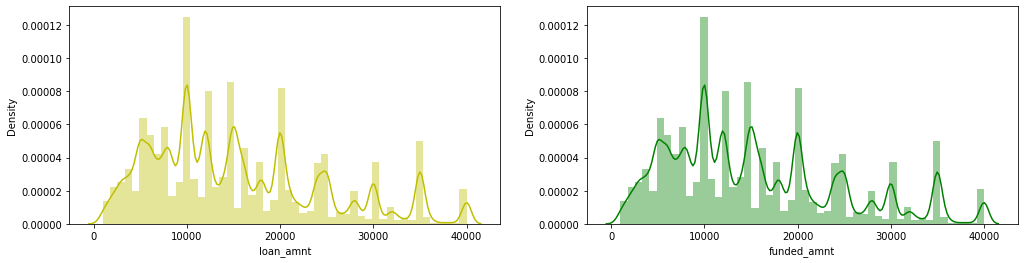

In [5]:
plt.figure(1, figsize=(17, 4))
plt.subplot(1, 2, 1)
sns.distplot(accepted_df["loan_amnt"], color="y")
plt.subplot(1, 2, 2)
sns.distplot(accepted_df["funded_amnt"], color="g")

These variables are similarly distributed,which shows that there is an adequate balance between loan and funding amount.

<AxesSubplot:title={'center':'Employement Duration'}>

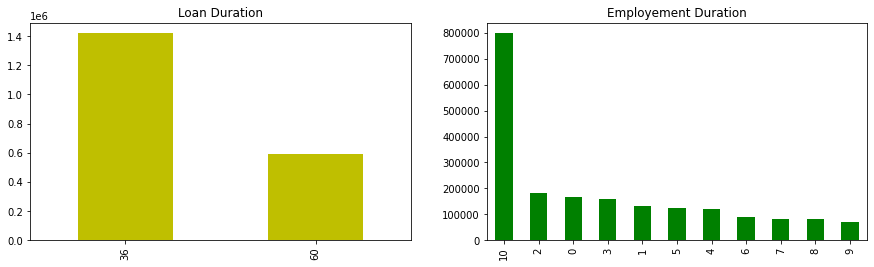

In [6]:
plt.figure(1, figsize=(15, 4))
plt.subplot(1, 2, 1)
accepted_df["term"].value_counts().plot(kind="bar", title="Loan Duration", color="y")
plt.subplot(1, 2, 2)
accepted_df["emp_length"].value_counts().plot(kind="bar", title="Employement Duration", color="g")

**_Interpretation_**-

   - 1.Most of the loan is taken for duration of 36 months. 
   - 2.People who are being employed for more than 10 years are more likely to take loan.


<AxesSubplot:title={'center':'verification status'}>

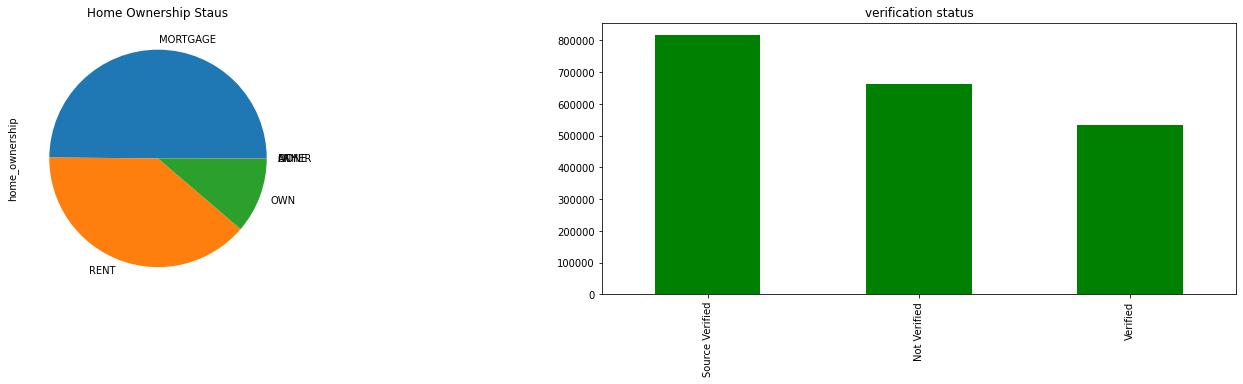

In [7]:
plt.figure(1, figsize=(25, 5))
plt.subplot(1, 2,1)
accepted_df["home_ownership"].value_counts().plot(kind="pie", title="Home Ownership Staus")
plt.subplot(1, 2,2)
accepted_df["verification_status"].value_counts().plot(kind="bar", title="verification status",color='g')



**_Interpretation-_**

- 1.People who are taking loan are having their Home Ownership as Rent or in Mortgage.

- 2.Most of loan applications are having their income source verified.


<AxesSubplot:title={'center':'Loan Status'}>

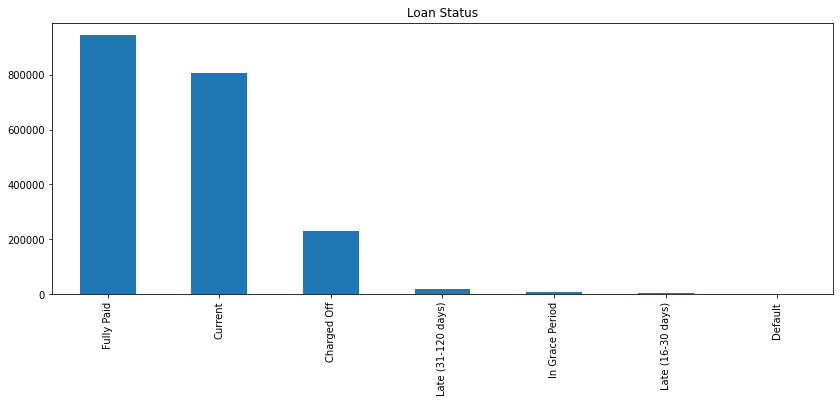

In [8]:
plt.figure(1, figsize=(14, 5))
accepted_df["loan_status"].value_counts().plot(kind="bar", title="Loan Status")

Most of the loan are having status Fully Paid but there are still considerable amount of loan application that are in Charged off state.

We are mainly interested in two classes of loan Fully paid and charged off 

In [9]:
df_loan=accepted_df.loc[(accepted_df['loan_status'].isin(['Fully Paid','Charged Off']))]

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

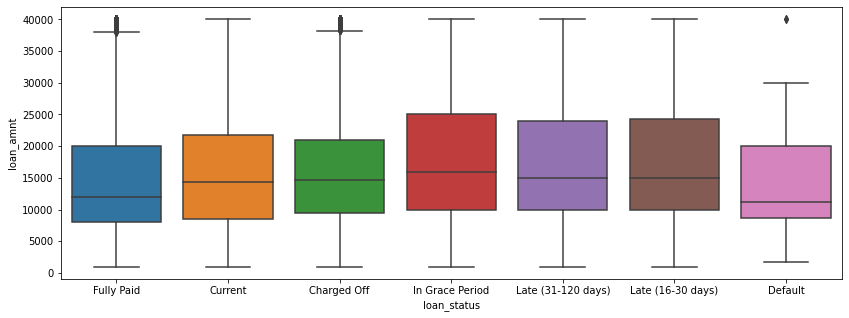

In [10]:
plt.figure(1, figsize=(14, 5))
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = accepted_df)

We can see that loans are not unique. Certain amount appears several times. May be the reason that company has some range or certain amount to lend.

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

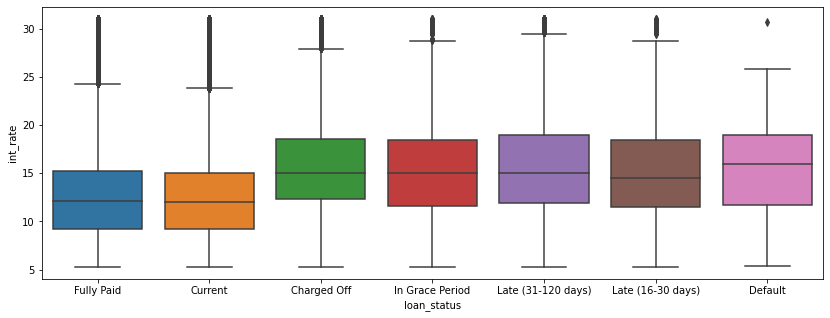

In [11]:
plt.figure(1, figsize=(14, 5))
sns.boxplot(x='loan_status',y='int_rate',data=accepted_df)

Customer who could not pay back and eventually were charged off had to pay a heigher interest rate.

<AxesSubplot:xlabel='grade', ylabel='count'>

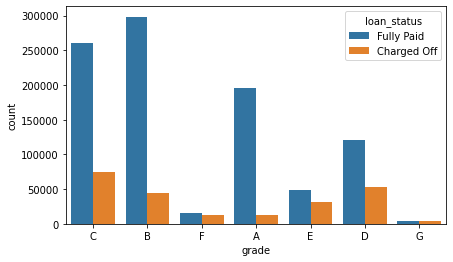

In [12]:
#loan status vs grade
plt.figure(1, figsize=(15, 4))
plt.subplot(1,2,1)
sns.countplot(x = 'grade', data = df_loan, hue = 'loan_status')

We can see that grade have same shape and relation with loan status.

From the plot it looks like emp_length has a little relationship with the loan status.

<AxesSubplot:xlabel='verification_status', ylabel='count'>

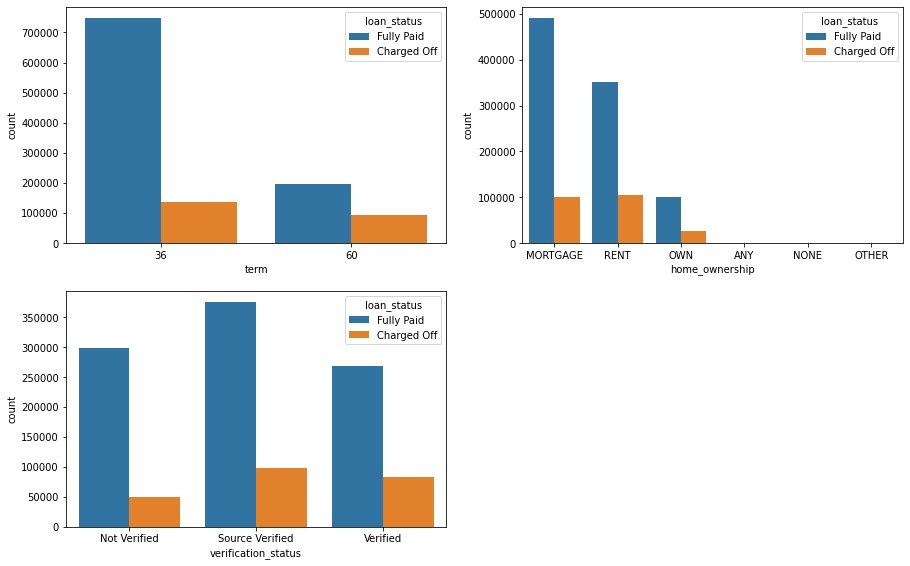

In [13]:
plt.figure(figsize=(15, 20))
plt.subplot(4, 2, 1)
sns.countplot(x='term', data=df_loan, hue='loan_status')
plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df_loan, hue='loan_status')
plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df_loan, hue='loan_status')

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

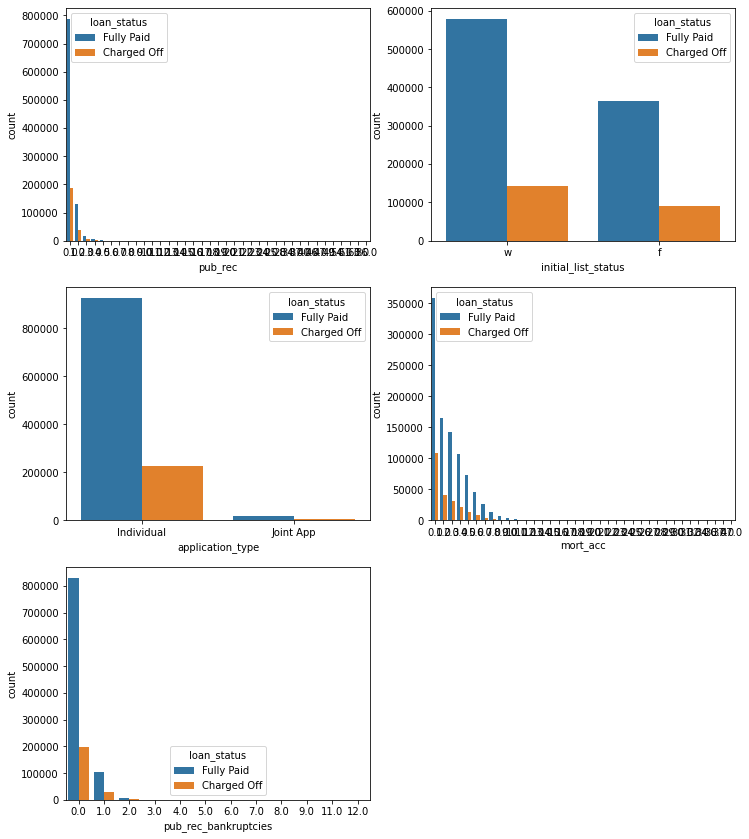

In [14]:
plt.figure(figsize=(12, 30))
plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=df_loan, hue='loan_status')
plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=df_loan, hue='loan_status')
plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=df_loan, hue='loan_status')
plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=df_loan, hue='loan_status')
plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=df_loan, hue='loan_status')

**_What we need to know:_**

  - Understand what amount was mostly issued to borrowers.
  - Which year issued the most loans.
  - The distribution of loan amounts is a multinomial distribution .

**_Summary:_**

  - Most of the loans issued were in the range of 10,000 to 20,000 USD.
  - The year of 2015 was the year were most loans were issued.
  - Loans were issued in an incremental manner. (Possible due to a recovery in the U.S economy)
  - The loans applied by potential borrowers, the amount issued to the borrowers and the amount funded by investors are similarly distributed, meaning that it is most likely that qualified borrowers are going to get the loan they had applied for.

Text(0.5, 1.0, 'Total committed by Investors')

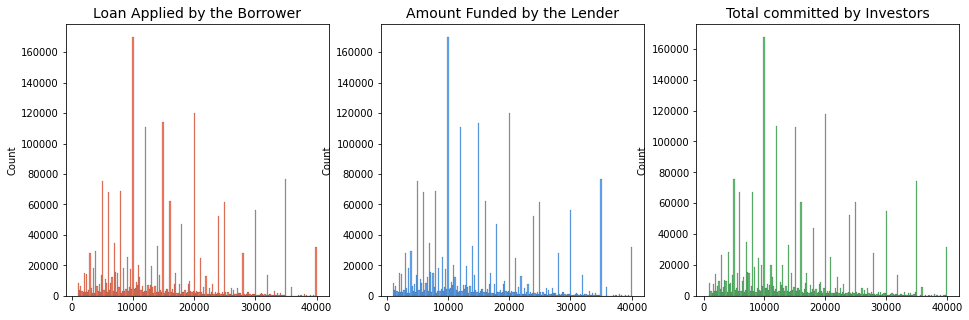

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))


loan_amnt = accepted_df["loan_amnt"].values
funded_amnt = accepted_df["funded_amnt"].values
funded_amnt_inv = accepted_df["funded_amnt_inv"].values


sns.histplot(loan_amnt, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.histplot(funded_amnt, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.histplot(funded_amnt_inv, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

**_Good Loans vs Bad Loans:_**
In this section, we will see what is the amount of bad loans Lending Club has declared so far, of course we have to understand that there are still loans that are at a risk of defaulting in the future.

**_What we need to know:_**

The amount of bad loans could increment as the days pass by, since we still have a great amount of current loans.
Average annual income is an important key metric for finding possible opportunities of investments in a specific region.
**_Summary:_**

- Currently, bad loans consist 7.60% of total loans but remember that we still have current loans which have the risk of becoming bad loans. (So this percentage is subjected to possible changes.)
- The NorthEast region seems to be the most attractive in term of funding loans to borrowers.
- The SouthWest and West regions have experienced a slight increase in the "median income" in the past years.
- Average interest rates have declined since 2012 but this might explain the increase in the volume of loans.
- Employment Length tends to be greater in the regions of the SouthWest and West
- Clients located in the regions of NorthEast and MidWest have not experienced a drastic increase in debt-to-income(dti) as compared to the other regions.

In [18]:
# Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


accepted_df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
accepted_df['loan_condition'] = accepted_df['loan_status'].apply(loan_condition)

[Text(0, 0.5, '(%)')]

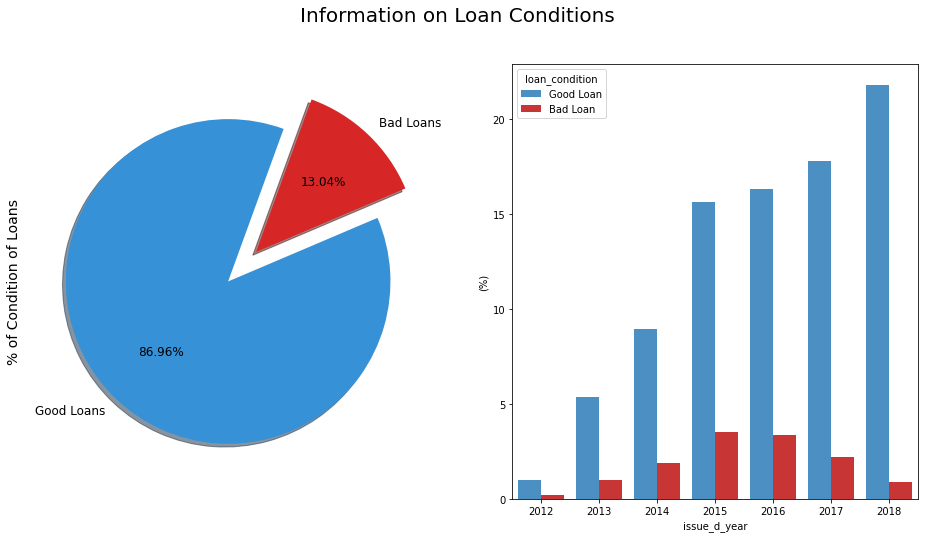

In [19]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

accepted_df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="issue_d_year", y="loan_amnt", hue="loan_condition", data=accepted_df, palette=palette, estimator=lambda x: len(x) / len(accepted_df) * 100)
ax[1].set(ylabel="(%)")

**_Interest Rate base on Grade_**

We also wanted to look at the distribution of interst rate that loans are given, based on their LendingClub assigned grade.

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

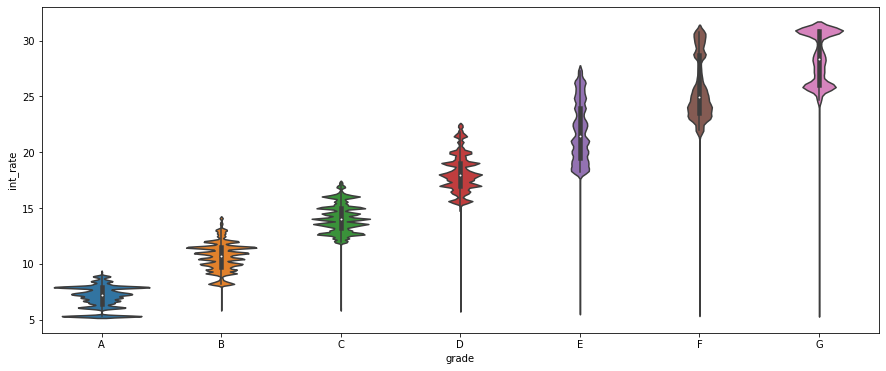

In [16]:
plt.subplots(figsize=(15,6))
sns.violinplot(x="grade", y="int_rate", data=accepted_df, order="ABCDEFG")

**_Interpretation-_**
- Interest rate varies wildly, reaching nearly 30% for high-risk loans
- Grade A has the lowest interest rate around 7%
- Grade G has the highest interest rate above 25%

**_Loan status by grade_**
We were also curious how accurate LendingClub's Grades were. This is a look into what percentage of loans are current or already paid off by grade.

In [17]:
print("% of loans that are current or fully paid by grade")
print(f"A: {round((103322+39679)/(2617+103322+47+39679+365+134+492) * 100, 2)}%")
print(f"B: {round((171735+66546)/(9519+171735+198+66546+1240+410+2004) * 100, 2)}%")
print(f"C: {round((171175+52678)/(12642+171175+360+52678+1887+678+3339) * 100, 2)}%")
print(f"D: {round((91984+30020)/(10486+91984+312+30020+1405+369+2890) * 100, 2)}%")
print(f"E: {round((47061+12928)/(6258+47061+201+12928+908+368+1852) * 100, 2)}%")
print(f"F: {round((13589+4726)/(2934+13589+79+4726+354+155+768)* 100, 2)}%")
print(f"G: {round((2913+1146)/(792+2913+22+1146+94+42+246)* 100, 2)}%")

pd.pivot_table(accepted_df, index="loan_status", columns="grade", aggfunc="size")

% of loans that are current or fully paid by grade
A: 97.51%
B: 94.69%
C: 92.21%
D: 88.75%
E: 86.22%
F: 81.02%
G: 77.24%


grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,12018.0,44852.0,74694.0,52489.0,31222.0,12572.0,4039.0
Current,184838.0,240595.0,233072.0,104044.0,34067.0,7679.0,2246.0
Default,5.0,6.0,7.0,12.0,4.0,1.0,NaN
Fully Paid,195978.0,298475.0,260041.0,120165.0,49282.0,15009.0,3959.0
In Grace Period,587.0,1587.0,2704.0,1713.0,725.0,216.0,95.0
Late (16-30 days),313.0,874.0,1326.0,844.0,362.0,116.0,33.0
Late (31-120 days),1214.0,4197.0,6714.0,4157.0,1875.0,573.0,217.0


**_The Importance of Credit Scores:_**
Credit scores are important metrics for assesing the overall level of risk. In this section we will analyze the level of risk as a whole and how many loans were bad loans by the type of grade received in the credit score of the customer.

**_What we need to know:_**

- The lower the grade of the credit score, the higher the risk for investors.
- There are different factors that influence on the level of risk of the loan.

**_Summary:_**

- The scores that has a lower grade received a larger amounts of loans (which might had contributed to a higher level of risk).

- Logically, the lower the grade the higher the interest the customer had to pay back to investors.

- Interstingly, customers with a grade of "C" were more likely to default on the loan

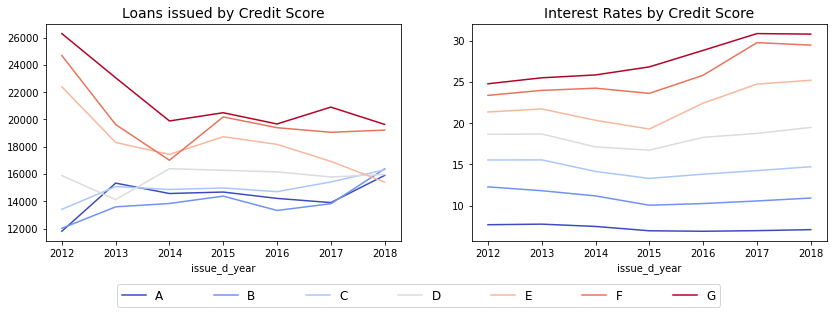

In [21]:
# Let's visualize how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = accepted_df.groupby(['issue_d_year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = accepted_df.groupby(['issue_d_year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

Text(0, 0.5, 'Interest Rate (%)')

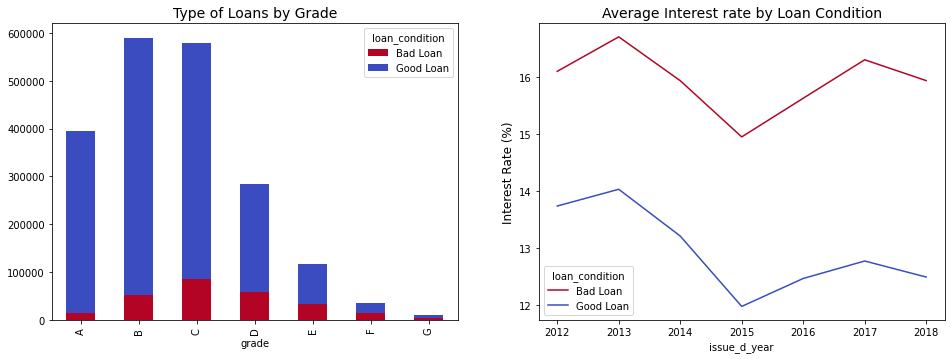

In [23]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

cmap = plt.cm.coolwarm_r

loans_by_region = accepted_df.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


by_interest = accepted_df.groupby(['issue_d_year', 'loan_condition']).int_rate.mean()
by_interest.unstack().plot(ax=ax2, colormap=cmap)
ax2.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax2.set_ylabel('Interest Rate (%)', fontsize=12)

## Data Preprocessing

In [24]:
object_columns = accepted_df.columns[accepted_df.dtypes==np.object].tolist()
object_columns

['grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'initial_list_status',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag',
 'loan_condition']

In [25]:
# Label Binarizer
label_binary_columns = ['pymnt_plan','initial_list_status','application_type','hardship_flag','disbursement_method',
                        'debt_settlement_flag']

labelb = LabelBinarizer()
for col in label_binary_columns:
    accepted_df[col] = labelb.fit_transform(accepted_df[col])

object_columns

labele = LabelEncoder()
#accepted_df['grade'] = labele.fit_transform(accepted_df['grade']) # grade label encoded

object_columns.remove('grade')

for col in object_columns:
    print(f'unique values in {col} are:',accepted_df[col].unique())
    print(f'number of unique values in {col} are:',len(accepted_df[col].unique()))

#label encoding remaining object columns
accepted_df['home_ownership'] = labele.fit_transform(accepted_df['home_ownership'])

accepted_df['verification_status'] = labele.fit_transform(accepted_df['verification_status'])

accepted_df['loan_status'] = labele.fit_transform(accepted_df['loan_status'])

unique values in home_ownership are: ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER']
number of unique values in home_ownership are: 6
unique values in verification_status are: ['Not Verified' 'Source Verified' 'Verified']
number of unique values in verification_status are: 3
unique values in loan_status are: ['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default']
number of unique values in loan_status are: 7
unique values in pymnt_plan are: [0 1]
number of unique values in pymnt_plan are: 2
unique values in initial_list_status are: [1 0]
number of unique values in initial_list_status are: 2
unique values in application_type are: [0 1]
number of unique values in application_type are: 2
unique values in hardship_flag are: [0 1]
number of unique values in hardship_flag are: 2
unique values in disbursement_method are: [0 1]
number of unique values in disbursement_method are: 2
unique values in debt_settlement_flag are: [0 1]
number of uni

In [26]:
accepted_df[object_columns].head()

,home_ownership,verification_status,loan_status,pymnt_plan,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag,loan_condition
0,1,0,3,0,1,0,0,0,0,Good Loan
1,1,0,3,0,1,0,0,0,0,Good Loan
2,1,0,3,0,1,1,0,0,0,Good Loan
3,1,1,1,0,1,0,0,0,0,Good Loan
4,1,1,3,0,1,0,0,0,0,Good Loan


In [29]:
# Droping loan_condition because its only for ananlysis
accepted_df.drop('loan_condition', inplace=True, axis=1)

In [35]:
accepted_df['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

In [ ]:
accepted_df.isnull().sum().sum()

In [36]:
accepted_df.to_csv('Ready_Model.csv')